# Implementing Linear Regression with Gradient Descent

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generate some artificial data:

In [5]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X+np.random.randn(100, 1)

The model is: $$ \mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\varepsilon}$$
Where $\mathbf{y}$ is a $N\times1$ vector, $\mathbf{X}$ is a $N\times K$ feature matrix, and $\mathbf{\varepsilon}$ is a $N\times 1$ normally distributed errors.

The **loss function** is the mean squarred error (MSE): $$ L = \frac{1}{2N}\sum(\mathbf{X}\mathbf{\beta} - \mathbf{y})^2$$
And the **gradient** is: $$\frac{\partial L}{\partial \beta_j} = \frac{1}{N}\sum(\mathbf{X}\mathbf{\beta} - \mathbf{y})X_j$$

The idea is to calculate the gradient at each step and take a step of magnitude `rate` (learning rate) in that direction. Keep doing this until either we reached the maximum number of iterations or that the difference between the coefficients found in two consecutive iterations is less than `precision` value.

### Class `CustomLinearRegression`

Create a class that will have a fit method that will find the optimal solution based on a simple gradien descent procedure. It will use the `gradient()` method and also the `loss()` method that stores the values of the loss function (in this case - the MSE) at each iteration. 

In addition create two plotting methods: one will plot the progression of the loss along the iterations, and the other will plot the progression of the fitting lines (determined by the coefficient values we are trying to optimize) 

In [2]:
class CustomLinearRegression:

    def __init__(self, seed=1234):
        import numpy as np
        np.random.seed(seed)

    @staticmethod
    def __loss(X, beta, y):
        """
        Computes the loss function (MSE) for a given X matrix, beta vector and y vector
        """
        n = len(y)
        h = np.dot(X, beta)
        return (1/2*n) * np.sum(np.square(h - y))

    @staticmethod
    def __gradient(X, beta, y):
        """
        Computes the gradient of the loss function
        """
        n = len(y)
        h = np.dot(X, beta)
        return 1/n * np.sum((X.T).dot(h - y))

    def fit(self, x, y, rate=0.001, precision=0.0000001, max_iters=10000, verbose=False):
        """
        Description:
            Fits a linear regression using gradient descent.
            Will keep trying to get to the optimum as long as the absolute difference between two consecutive iterations
            is bigger than `precision` and number of iterations is less than `max_iters`

        Parameters:
            X (ndarray)
            y (ndarray)
            rate (float): The learning rate
            precision (float): The minimal difference between two consecutive beta values
                               above which the fitting process will continue
            max_iters (int): The maximum number of iterations
            verbose (boolean): If True will print the progress of the fitting to the console

        Returns:
            The found beta vector
        """

        # Initialize parameters
        cur_beta = np.random.randn(2, 1)
        self.__X_intercept = np.c_[np.ones((len(x), 1)), x]
        previous_step_size = 1

        self.__iters = 0
        self.__beta_array = np.zeros((max_iters, 2))  # for graphing
        self.__loss_array = np.zeros(max_iters)       # for graphing

        while (previous_step_size > precision) & (self.__iters < max_iters):
            prev_beta = cur_beta
            cur_beta = cur_beta - rate * self.__gradient(self.__X_intercept, cur_beta, y)
            previous_step_size = abs(cur_beta[1] - prev_beta[1])
            self.__iters += 1

            self.__beta_array[self.__iters, :] = cur_beta.T
            self.__loss_array[self.__iters] = self.__loss(self.__X_intercept, cur_beta, y)

            if verbose:
                print("\nIteration ", self.__iters, "\nBeta0: ", cur_beta[0][0], " Beta1: ", cur_beta[1][0])

        return cur_beta

    def plot_loss(self, style='b.'):
        """
        Plots the progression of the loss function.
        Style is matplotlib notation for color and linestyle.
        """
        fig, ax = plt.subplots(figsize=(10,6))
        ax.set_ylabel('Loss')
        ax.set_xlabel('Iterations')
        ax.plot(range(1,self.__iters), self.__loss_array[1:self.__iters], style)
        plt.show()

    def plot_fit(self, x, y, data_style='b.', fit_style='r-', alpha=0.08):
        """
        Plots the fitted lines from the process of getting to the optimum
        """
        import tqdm  # for progress bar, because it is kind of slow.
        fig, ax = plt.subplots(sharey=True, figsize=(10,6))
        ax.plot(x, y, data_style)
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$y$")
        for i in tqdm.tqdm(range(1, self.__iters)):
            ax.plot(x, np.dot(self.__X_intercept, self.__beta_array[i]), fit_style, alpha=alpha)
        plt.show()

Instantiate the modeling class

In [3]:
model = CustomLinearRegression(seed=1203)

Test the `fit()` method

In [6]:
model.fit(x=X, y=y, verbose=True)


Iteration  1 
Beta0:  1.9555608176646457  Beta1:  -0.21777626895322358

Iteration  2 
Beta0:  1.9675489424226333  Beta1:  -0.20578814419523606

Iteration  3 
Beta0:  1.9794844509765759  Beta1:  -0.19385263564129343

Iteration  4 
Beta0:  1.9913675742604173  Beta1:  -0.181969512357452

Iteration  5 
Beta0:  2.003198542194526  Beta1:  -0.17013854442334342

Iteration  6 
Beta0:  2.0149775836901433  Beta1:  -0.158359502927726

Iteration  7 
Beta0:  2.0267049266538137  Beta1:  -0.14663215996405568

Iteration  8 
Beta0:  2.038380797991793  Beta1:  -0.13495628862607645

Iteration  9 
Beta0:  2.0500054236144396  Beta1:  -0.12333166300342997

Iteration  10 
Beta0:  2.061579028440585  Beta1:  -0.1117580581772846

Iteration  11 
Beta0:  2.0731018364018863  Beta1:  -0.10023525021598348

Iteration  12 
Beta0:  2.084574070447158  Beta1:  -0.08876301617071192

Iteration  13 
Beta0:  2.0959959525466862  Beta1:  -0.07734113407118356

Iteration  14 
Beta0:  2.107367703696524  Beta1:  -0.065969382921345


Iteration  338 
Beta0:  4.066644137996797  Beta1:  1.8933070513789323

Iteration  339 
Beta0:  4.0693666609212364  Beta1:  1.8960295743033713

Iteration  340 
Beta0:  4.072077234618869  Beta1:  1.8987401480010044

Iteration  341 
Beta0:  4.074775911535177  Beta1:  1.9014388249173118

Iteration  342 
Beta0:  4.077462743885453  Beta1:  1.9041256572675884

Iteration  343 
Beta0:  4.08013778365582  Beta1:  1.9068006970379552

Iteration  344 
Beta0:  4.082801082604229  Beta1:  1.9094639959863646

Iteration  345 
Beta0:  4.085452692261467  Beta1:  1.9121156056436022

Iteration  346 
Beta0:  4.088092663932148  Beta1:  1.914755577314283

Iteration  347 
Beta0:  4.09072104869571  Beta1:  1.9173839620778452

Iteration  348 
Beta0:  4.093337897407403  Beta1:  1.9200008107895379

Iteration  349 
Beta0:  4.095943260699269  Beta1:  1.9226061740814047

Iteration  350 
Beta0:  4.098537188981129  Beta1:  1.925200102363264

Iteration  351 
Beta0:  4.10111973244155  Beta1:  1.9277826458236849

Iteration

Iteration  701 
Beta0:  4.561298422641317  Beta1:  2.3879613360234484

Iteration  702 
Beta0:  4.5618498945216635  Beta1:  2.388512807903794

Iteration  703 
Beta0:  4.562398945977  Beta1:  2.3890618593591304

Iteration  704 
Beta0:  4.5629455876306375  Beta1:  2.389608501012768

Iteration  705 
Beta0:  4.563489830059261  Beta1:  2.390152743441392

Iteration  706 
Beta0:  4.564031683793135  Beta1:  2.3906945971752656

Iteration  707 
Beta0:  4.564571159316304  Beta1:  2.3912340726984347

Iteration  708 
Beta0:  4.5651082670668  Beta1:  2.391771180448931

Iteration  709 
Beta0:  4.565643017436842  Beta1:  2.392305930818972

Iteration  710 
Beta0:  4.566175420773035  Beta1:  2.392838334155165

Iteration  711 
Beta0:  4.566705487376575  Beta1:  2.393368400758705

Iteration  712 
Beta0:  4.567233227503445  Beta1:  2.393896140885575

Iteration  713 
Beta0:  4.567758651364614  Beta1:  2.3944215647467435

Iteration  714 
Beta0:  4.5682817691262345  Beta1:  2.394944682508364

Iteration  715 
B

Iteration  1067 
Beta0:  4.661828813475133  Beta1:  2.48849172685726

Iteration  1068 
Beta0:  4.661939054749057  Beta1:  2.4886019681311837

Iteration  1069 
Beta0:  4.6620488121710455  Beta1:  2.4887117255531725

Iteration  1070 
Beta0:  4.662158087864738  Beta1:  2.4888210012468654

Iteration  1071 
Beta0:  4.662266883944453  Beta1:  2.488929797326581

Iteration  1072 
Beta0:  4.66237520251523  Beta1:  2.489038115897358

Iteration  1073 
Beta0:  4.662483045672868  Beta1:  2.4891459590549956

Iteration  1074 
Beta0:  4.662590415503968  Beta1:  2.4892533288860954

Iteration  1075 
Beta0:  4.662697314085973  Beta1:  2.4893602274681004

Iteration  1076 
Beta0:  4.662803743487208  Beta1:  2.4894666568693355

Iteration  1077 
Beta0:  4.66290970576692  Beta1:  2.489572619149048

Iteration  1078 
Beta0:  4.663015202975319  Beta1:  2.489678116357447

Iteration  1079 
Beta0:  4.663120237153614  Beta1:  2.4897831505357426

Iteration  1080 
Beta0:  4.663224810334058  Beta1:  2.4898877237161865



Iteration  1453 
Beta0:  4.6823480617259685  Beta1:  2.509010975108096

Iteration  1454 
Beta0:  4.682368243463926  Beta1:  2.5090311568460533

Iteration  1455 
Beta0:  4.6823883366236885  Beta1:  2.5090512500058164

Iteration  1456 
Beta0:  4.682408341594029  Beta1:  2.5090712549761576

Iteration  1457 
Beta0:  4.682428258762014  Beta1:  2.5090911721441422

Iteration  1458 
Beta0:  4.682448088513009  Beta1:  2.5091110018951377

Iteration  1459 
Beta0:  4.68246783123069  Beta1:  2.5091307446128193

Iteration  1460 
Beta0:  4.68248748729705  Beta1:  2.5091504006791783

Iteration  1461 
Beta0:  4.682507057092402  Beta1:  2.50916997047453

Iteration  1462 
Beta0:  4.682526540995393  Beta1:  2.5091894543775206

Iteration  1463 
Beta0:  4.682545939383005  Beta1:  2.5092088527651333

Iteration  1464 
Beta0:  4.68256525263057  Beta1:  2.509228166012698

Iteration  1465 
Beta0:  4.6825844811117685  Beta1:  2.5092473944938964

Iteration  1466 
Beta0:  4.6826036251986425  Beta1:  2.509266538580


Iteration  1829 
Beta0:  4.686066641698271  Beta1:  2.512729555080398

Iteration  1830 
Beta0:  4.686070502488079  Beta1:  2.512733415870206

Iteration  1831 
Beta0:  4.686074346332775  Beta1:  2.5127372597149034

Iteration  1832 
Beta0:  4.6860781733067345  Beta1:  2.512741086688862

Iteration  1833 
Beta0:  4.686081983484001  Beta1:  2.5127448968661286

Iteration  1834 
Beta0:  4.686085776938296  Beta1:  2.5127486903204237

Iteration  1835 
Beta0:  4.686089553743018  Beta1:  2.5127524671251456

Iteration  1836 
Beta0:  4.6860933139712415  Beta1:  2.512756227353369

Iteration  1837 
Beta0:  4.686097057695721  Beta1:  2.512759971077849

Iteration  1838 
Beta0:  4.686100784988893  Beta1:  2.512763698371021

Iteration  1839 
Beta0:  4.686104495922875  Beta1:  2.5127674093050025

Iteration  1840 
Beta0:  4.686108190569466  Beta1:  2.5127711039515943

Iteration  1841 
Beta0:  4.686111869000154  Beta1:  2.5127747823822824

Iteration  1842 
Beta0:  4.68611553128611  Beta1:  2.51277844466823

Beta0:  4.686772748358335  Beta1:  2.5134356617404583

Iteration  2199 
Beta0:  4.6867735100268995  Beta1:  2.5134364234090234

Iteration  2200 
Beta0:  4.6867742683524805  Beta1:  2.5134371817346044

Iteration  2201 
Beta0:  4.68677502334975  Beta1:  2.513437936731874

Iteration  2202 
Beta0:  4.686775775033316  Beta1:  2.51343868841544

Iteration  2203 
Beta0:  4.6867765234177226  Beta1:  2.5134394367998465

Iteration  2204 
Beta0:  4.686777268517449  Beta1:  2.5134401818995737

Iteration  2205 
Beta0:  4.686778010346914  Beta1:  2.513440923729038

Iteration  2206 
Beta0:  4.686778748920468  Beta1:  2.5134416623025926

Iteration  2207 
Beta0:  4.686779484252404  Beta1:  2.513442397634528

Iteration  2208 
Beta0:  4.686780216356947  Beta1:  2.5134431297390716

Iteration  2209 
Beta0:  4.686780945248264  Beta1:  2.5134438586303887

Iteration  2210 
Beta0:  4.686781670940458  Beta1:  2.5134445843225817

Iteration  2211 
Beta0:  4.686782393447568  Beta1:  2.5134453068296922

Iteration  2

Beta0:  4.6869140959919875  Beta1:  2.513577009374105

Iteration  2582 
Beta0:  4.686914237281963  Beta1:  2.51357715066408

Iteration  2583 
Beta0:  4.686914377951812  Beta1:  2.5135772913339296

Iteration  2584 
Beta0:  4.686914518004258  Beta1:  2.5135774313863752

Iteration  2585 
Beta0:  4.68691465744201  Beta1:  2.513577570824127

Iteration  2586 
Beta0:  4.686914796267765  Beta1:  2.5135777096498826

Iteration  2587 
Beta0:  4.686914934484211  Beta1:  2.5135778478663284

Iteration  2588 
Beta0:  4.6869150720940205  Beta1:  2.513577985476138

Iteration  2589 
Beta0:  4.686915209099857  Beta1:  2.513578122481975

Iteration  2590 
Beta0:  4.686915345504372  Beta1:  2.5135782588864894

Iteration  2591 
Beta0:  4.686915481310203  Beta1:  2.513578394692321

Iteration  2592 
Beta0:  4.686915616519979  Beta1:  2.5135785299020967

Iteration  2593 
Beta0:  4.686915751136316  Beta1:  2.5135786645184335

Iteration  2594 
Beta0:  4.686915885161818  Beta1:  2.5135787985439353

Iteration  2595

array([[4.68692365],
       [2.51358656]])

Test plotting the loss progression

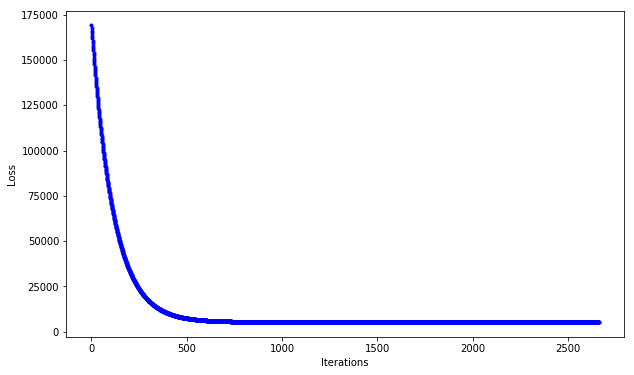

In [7]:
model.plot_loss()

Test plotting the line fits progression (added a nice progress bar because this process can take couple of seconds):

100%|██████████| 2660/2660 [00:03<00:00, 707.36it/s]


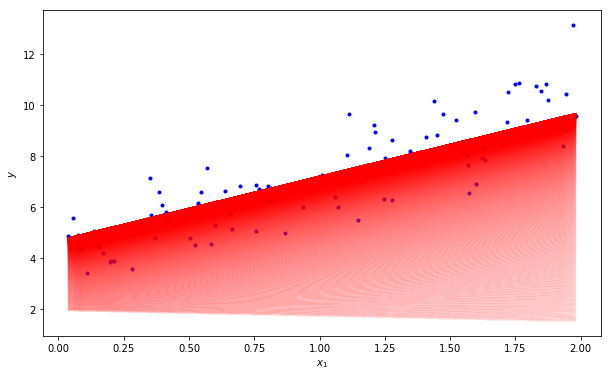

In [8]:
model.plot_fit(X, y)

We can now make comparisons of the fit and the reduction in the loss with respect to the learning rate, maximum number of iterations, etc.